# EPA112A - Programming for Data Science - Group 31

### *GDP Predictive Modeling Based: a deep-dive into Social, Economic, and Environmental Indicators*

*Authors:*
- *Georges Puttaert - 4686160*
- *Thijs Roolvink - 4961382*
- *Gijs de Werd - 4717775*

## Introduction

The Gross Domestic Product (GDP) of a country is a fundamental measure of its economic well-being and prosperity. Understanding the factors that influence GDP is of importance to governments, policymakers, and economists. In our research project, we analyze some of these critical drivers by comparing the economies and their GDP over the years of the Netherlands, Germany, Greece, and Ireland.

These four countries have been selected for their distinct economic sizes and profiles, making them ideal candidates for our analysis. The Netherlands and Germany represent two of the largest and most robust economies in Europe, while Greece and Ireland, while smaller in scale, offer insights into the economic characteristics of Southern and Western Europe. By analyzing a diverse set of economies, we aim to draw valuable insights into the factors that shape GDP.

The research question of this report is as following: 

**To what extent do Environmental, Social, and Governance (ESG) indicators, influence a country's GDP, and which machine learning model offers the most accurate GDP predictions based on these indicators?**

follewed by three corresponding subquestion: 

- How significantly do ESG indicators correlate with a country's GDP per capita?

- Among the machine learning models (Random Forest, Linear Regression, and MLP), which model gives the most accurate GDP predictions based on the combined set of indicators?

- Are there significant differences in prediction errors among these machine learning models when applied to each of the four selected countries (the Netherlands, Germany, Greece, and Ireland)?

- What is the relative impact of social, economic, and environmental indicators on a country's GDP?

Our analyses focusses on three categories of indicators: Environmental, Social (economy), Governance (ESG). Each category includes a set of indicators that may have a significant influence on a country's GDP. Our project will not only examine the correlation between these indicators and GDP but also employ machine-learning models for GDP prediction, taking into account these diverse indicators. Moreover, visualization techniques will be applied to illustrate these relationships and provide a better understanding of the complex interplay between social, economic, and environmental factors.

Firsly, the indicators that are being used during this report. Thereafter will be the importation of the usefull libraries. In chapter 1 the data is retrieved from the sources and it further preprocessed in a main dataframe. This gives easy acces to the corresponding data needed. In chapter 2 will be about the first visualization of the data per country. Per country, three timeseries (one for each pillar of ESG) followed by a correlation heatmap. Chapter 3 will deep-dive into Machine Learning by analyzing the data with the use of Random Forest, Linear Regression and Multi Layer Perceptron (MLP) neural network. By implementing the models, the GDP will be predicted and compared to each other with the use of a timeseries and alpha-lambda plot. The k-fold cross validation method is used within each model so make the outcome more reliable since the dataset is splitted into 5 fold by which one fold is used a test data. The average of the outcome per fold is generated as results. Chapter 4 visualizes the interim results by which the best machine learning is chosen. This model will deep dive in chapter 5 in each countries ESG pillar separatetly to find out which pillar (E, S or G) will contribute sufficient to the GDP and which not. Chapter 6 will be about the conclusion and discussions.

### Indicators per Category

For each category we selected a set of 3/4 indicators that may have a significant influence on a country's GDP and we have found reliable data for. 

**Social Indicators:**

- *Health Expenditure as a Percentage of GDP:* This metric reflects a nation's commitment to healthcare and the well-being of its citizens.
- *Immunization:* A crucial element of public health, immunization rates can indicate the overall health of a population.
- *Life Expectancy at Birth and Child Mortality:* These metrics offer insights into the longevity and quality of life within a country.
- *Incidence of Diseases:* The prevalence of diseases can impact the productivity and economic output of a nation.

**Economic (Governance) Indicators:**

- *Export and Import:* These indicators measure a country's involvement in international trade and the balance of trade.
- *Freight:* Reflecting transportation efficiency, freight indicators provide valuable data for logistical and supply chain analysis.

**Environmental Indicators:**

- *Renewable Energy Consumption:* This indicator assesses a country's commitment to sustainable and environmentally friendly energy sources.
- *Energy Efficiency:* Measuring the effectiveness of energy use, this indicator speaks to the sustainability of a country's energy policies.
- *Greenhouse Gas (GHG) Emissions:* The environmental impact of GHG emissions is a crucial aspect of sustainability and economic development.

### Import Packages

Here, we import essential libraries and packages for our project. These include libraries for data retrieval, such as wbdata, data visualization with plotly, machine learning tools from scikit-learn, data preprocessing with scaling, and additional libraries for data handling and visualization, including country converter and Matplotlib.

In [157]:
import wbdata
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import country_converter as coco
import warnings
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
import math
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error


warnings.filterwarnings('ignore')
plotly.offline.init_notebook_mode()

## 1. Data retrieving

In this chapter, we focus on the initial step of our analysis: data retrieval. The data is sourced from multiple repositories, including the World Bank and the European Data Bank, to gather ESG indicators for four countries: The Netherlands, Germany, Greece, and Ireland.

**Retrieving the indicators from the World Bank using the Package "wbdata" as DataFrames**

The World Bank is an international financial institution that provides financial and technical assistance to developing countries. Established in 1944, its primary focus is on poverty mitigation and sustainable development. The World Bank offers many data sets, ranging from economic indicators like GDP and inflation rates to social metrics such as health expenditure and education levels.

The indicators that are retrieved from the World Bank are:

- Gross Domestic Product per Capita

- Social Indicators:
    - *Health Expenditure as a Percentage of GDP* 
    - *Immunization*
    - *Life Expectancy at Birth and Child Mortality* 
    - *Incidence of Diseases* 

- Economic (Governance) Indicators:
    - *Export and Import* 
    - *Freight*

- Environmental Indicators:
    - *Renewable Energy Consumption*

In [158]:
# Define indicators Inequality and Social Welfare
health_indicators = {'SH.XPD.CHEX.GD.ZS': "Health Expenditure as a Percentage of GDP", "SH.IMM.IDPT": "Immunization"}
GDP_indicator = {'NY.GDP.PCAP.CD': 'gdppc'}
life_exp_indicator = {'SP.DYN.LE00.IN': 'Life Expectancy at Birth', 'SH.DYN.MORT': 'Child Mortality'}
disease_indicator = {'SH.TBS.INCD': 'Indicence of Diseases'} 

#Define indicators Import & Export
export_indicator = {'NE.EXP.GNFS.KD.ZG': 'Export'}
import_indicator = {'NE.IMP.GNFS.KD.ZG': 'Import'}
freight_indicator = {'IS.AIR.GOOD.MT.K1': 'Freight'}

#Define indicators Evironmental
renewable_energy_indicator = {'EG.FEC.RNEW.ZS': 'Renewable energy consumption (% of total final energy consumption)'}

In [159]:
countries = ['NLD', 'DEU', 'GRC', 'IRL']

#Dataframes Inequality and Social Welfare
df_health = wbdata.get_dataframe(health_indicators, country=countries, convert_date=True)
df_gdp = wbdata.get_dataframe(GDP_indicator, country=countries, convert_date=True)
df_life_exp = wbdata.get_dataframe(life_exp_indicator, country=countries, convert_date=True)
df_diseases = wbdata.get_dataframe(disease_indicator, country=countries, convert_date=True)

#Dataframes Import & Export
df_export = wbdata.get_dataframe(export_indicator, country=countries, convert_date=True)
df_import = wbdata.get_dataframe(import_indicator, country=countries, convert_date=True)
df_freight = wbdata.get_dataframe(freight_indicator, country=countries, convert_date=True)

#Dataframes Environmental
df_renewable = wbdata.get_dataframe(renewable_energy_indicator, country=countries, convert_date=True)

In [160]:
# Resetting index of the dataframes
df_health = df_health.reset_index()
df_gdp = df_gdp.reset_index()
df_life_exp = df_life_exp.reset_index()
df_diseases = df_diseases.reset_index()
df_export = df_export.reset_index()
df_import = df_import.reset_index()
df_freight = df_freight.reset_index()
df_renewable = df_renewable.reset_index()

#Formatting the dates column of the indicators DataFrames to year format
df_health['date'] = df_health['date'].dt.year
df_health = df_health.drop(['Immunization'], axis = 1)
df_gdp['date'] = df_gdp['date'].dt.year
df_life_exp['date'] = df_life_exp['date'].dt.year
df_diseases['date'] = df_diseases['date'].dt.year
df_export['date'] = df_export['date'].dt.year
df_import['date'] = df_import['date'].dt.year
df_freight['date'] = df_freight['date'].dt.year
df_renewable['date'] = df_renewable['date'].dt.year

**Retrieving the indicators from the European Data Bank by importing the csv of the individual datasets**

The European Data Bank is a less centralized entity compared to the World Bank but serves a similar purpose within the context of the European Union. It collects data from various European institutions and offers specific indicators that are highly relevant to the EU's policy objectives. Which is relevant for the scope of this study, that looks at four countries that are member of the European Union

The indicators that are retrieved from the European Data Bank are:

- Environmental Indicators:
    - *Air GHG* - https://ec.europa.eu/eurostat/databrowser/view/sdg_13_10__custom_8184934/default/table?lang=en 
    - *Energy Efficiency* - https://ec.europa.eu/eurostat/databrowser/view/nrg_ind_eff__custom_8226911/default/table?lang=en 

In [161]:
#Importing the csv files of the two indicators retrieved from the European Data Bank
df_emissions = df = pd.read_csv('Datasets/sdg_13_10_linear.csv')
df_efficiency =  pd.read_csv('Datasets/nrg_ind_eff_linear.csv')

#Converting ISO-2 country codes to ISO-3
cc = coco.CountryConverter()
df_emissions['geo'] = df_emissions['geo'].replace('EL', 'GR')
iso3_codes_emissions = cc.pandas_convert(series=df_emissions['geo'], to='ISO3')

#Removing columns that will not be used and renaming columns to merge DataFrame later with Dataframes from wbdata indicators 
df_emissions['geo_3'] = iso3_codes_emissions
GHG = df_emissions[df_emissions['geo_3'].isin(countries) & (df_emissions['airpol'] == 'GHG') & (df_emissions['unit'] == 'T_HAB') & (df_emissions['src_crf'] == 'TOTXMEMONIA')]
GHG = GHG[['geo_3', 'OBS_VALUE', 'TIME_PERIOD']]
country_names = cc.pandas_convert(series = GHG['geo_3'], to = 'name_short')
GHG['country'] = country_names
GHG = GHG.drop('geo_3', axis = 1)
GHG = GHG.rename(columns = {'OBS_VALUE' : 'GHG', 'TIME_PERIOD' : 'date'})

#Converting ISO-2 country codes to ISO-3
df_efficiency['geo'] = df_efficiency['geo'].replace('EL', 'GR')
iso3_codes_efficiency = cc.pandas_convert(series=df_efficiency['geo'], to='ISO3')
df_efficiency['geo_3'] = iso3_codes_efficiency

#Removing columns that will not be used and renaming columns to merge DataFrame later with Dataframes from wbdata indicators 
efficiency = df_efficiency[df_efficiency['geo_3'].isin(countries) & (df_efficiency['nrg_bal'] == 'PEC2020-2030') & (df_efficiency['unit'] == 'MTOE')]
efficiency = efficiency[['geo_3', 'OBS_VALUE', 'TIME_PERIOD']]
country_names = cc.pandas_convert(series = efficiency['geo_3'], to = 'name_short')
efficiency['country'] = country_names
efficiency = efficiency.drop('geo_3', axis = 1)
efficiency = efficiency.rename(columns = {'OBS_VALUE' : 'Energy efficiency', 'TIME_PERIOD' : 'date'})

**Merging the indicators for all four countries to a main DataFrame named ESG**

In [162]:
ESG = df_gdp
ESG = pd.merge(ESG, df_health, how = 'inner')
ESG = pd.merge(ESG, df_life_exp, how = 'inner')
ESG = pd.merge(ESG, df_diseases, how = 'inner')
ESG = pd.merge(ESG, df_export, how = 'inner')
ESG = pd.merge(ESG, df_import, how = 'inner')
ESG = pd.merge(ESG, df_freight, how = 'inner')
ESG = pd.merge(ESG, df_renewable, how = 'inner')
ESG = pd.merge(ESG, GHG, how = 'inner')
ESG = pd.merge(ESG, efficiency, how = 'inner')
ESG = ESG.rename(columns= {'Renewable energy consumption (% of total final energy consumption)': 'Renewable', 'Health Expenditure as a Percentage of GDP': 'Health Expenditure'})

ESG

country  date         gdppc  Health Expenditure  \
0        Germany  2021  51203.554473           12.805395   
1        Germany  2020  46772.825351           12.822489   
2        Germany  2019  46793.686762           11.696230   
3        Germany  2018  47939.278288           11.457275   
4        Germany  2017  44652.589172           11.324208   
..           ...   ...           ...                 ...   
123  Netherlands  1994  24646.314310                 NaN   
124  Netherlands  1993  23122.410767                 NaN   
125  Netherlands  1992  23904.037415                 NaN   
126  Netherlands  1991  21732.230762                 NaN   
127  Netherlands  1990  21290.860383                 NaN   

     Life Expectancy at Birth  Child Mortality  Indicence of Diseases  \
0                   80.900976              3.6                    5.0   
1                   81.041463              3.6                    5.3   
2                   81.292683              3.7                    6.1   
3                   80.892683              3.8                    7.0   
4                   80.992683              3.9                    7.1   
..                        ...              ...                    ...   
123                 77.375122              7.1                    NaN   
124                 76.916585              7.4                    NaN   
125                 77.217073              7.7                    NaN   
126                 77.000000              8.0                    NaN   
127                 76.878049              8.3                    NaN   

       Export    Import       Freight  Renewable   GHG  Energy efficiency  
0    9.707776  8.995446  11533.048536        NaN   9.4             266.98  
1   -9.274737 -8.502678   9166.371283      18.60   9.0             262.10  
2    1.265017  2.859892   7763.619214      17.07   9.8             285.24  
3    2.223462  3.992724   7969.863640      16.04  10.5             291.95  
4    4.898995  5.225381   7901.652344      15.22  10.9             298.12  
..        ...       ...           ...        ...   ...                ...  
123  8.669595  9.033953   3203.800049       1.24  15.9              62.59  
124  3.968518  0.394176   2770.699951       1.19  15.9              63.07  
125  2.943402  2.851693   2396.899902       1.19  16.0              61.00  
126  6.608072  6.336230   2224.300049       1.15  16.0              61.46  
127  5.658577  3.973988   2129.100098       1.18  15.6              58.50  

[128 rows x 13 columns]

In [163]:
indicators_social = ['Health Expenditure', 'Life Expectancy at Birth', 'Child Mortality', 'Indicence of Diseases']
indicators_env = ['GHG', 'Renewable', 'Energy efficiency']
indicators_economy = ['Export', 'Import', 'Freight']

**Setting up timeframe (2001 - 2020)**

For this study, the timeframe selected is from the year 2001 to 2020. This decision is made in terms of the data availability across all chosen indicators from both the World Bank and the European Data Bank. The 20-year period offers enough data to perform Machine Learning methods later in the study.

In [164]:
ESG = ESG[(ESG['date'] >= 2001) & (ESG['date'] <= 2020)]

## 2: Data Visualization and Correlation

In this chapter, we visualise the data of every indicator for each country and indicate the correlation to the GDP per capita. 

**Exploring Indicator Relationships to a country's GDP:**

Firstly, we use Plotly to create a series of data visualizations, categorizing them into three sections: Social, Economic and Environmental indicators. Every section vizualises the relationships between the indicators for the different categories and a country's Gross Domestic Product (GDP).

In the Social indicators plot (the first figure), we dive into critical social indications (focussed on health) and try to see their connection with GDP per capita. The inclusion of a black dashed line representing GDP per capita acts as a reference point, helping us in seeing the influence of social factors on economic trends.

In the Economic indicators plot (the second figure), we examine trends in economic data alongside GDP per capita. This analysis provides insights into how economic factors correspond to changes in economic trends.

The Environmental indicators plot (the third figure) give the trends of the environmental indicators, alongside the GDP per capita. This visualization contributes to our understanding of the relation between environmental sustainability and economic development.

**Analyzing Indicator Correlations:**

After the visualization, we use Pandas to calculate a correlation matrix, for every country. The resulting correlation matrix is translated into an interactive heatmap (fig), where color intensity reflects the strength and direction of correlations. This visualization is instrumental in identifying potential patterns and dependencies between indicators.

By reading the correlation matrix, we get valuable insights into how different factors correlate within the GDP per capita. This offers a deeper understanding of which indicators may have positive or negative impacts on the GDP of a country.

*Note: 'gdppc' stand for Gross Domestic Product (GDP) per capita*

### The Netherlands

**The Netherlands Social, Economic and Environmental indicators, and GDP per capita plotted:**

In [165]:
fig1 = px.line(ESG[ESG['country']=='Netherlands'], x='date', y=indicators_social, width = 1300)
fig1.add_scatter(x=ESG[ESG['country']=='Netherlands']['date'], y=ESG[ESG['country']=='Netherlands']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig1.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Social Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig1.show()

fig2 = px.line(ESG[ESG['country']=='Netherlands'], x='date', y=indicators_economy, width = 1300)
fig2.add_scatter(x=ESG[ESG['country']=='Netherlands']['date'], y=ESG[ESG['country']=='Netherlands']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash')) 
fig2.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Economic Indicators', legend_title = dict(text = 'Indicator'), yaxis1=dict(title='Value'))
fig2.show()

fig3 = px.line(ESG[ESG['country']=='Netherlands'], x='date', y=indicators_env, width = 1300)
fig3.add_scatter(x=ESG[ESG['country']=='Netherlands']['date'], y=ESG[ESG['country']=='Netherlands']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig3.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right', ), title='Environmental Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig3.show()

**Correlation between all indicators and GDP per capita:**

The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear relationship. A positive value implies that as one variable increases, the other tends to increase, while a negative value suggests the opposite. On the right side of the figure below, the correlation coefficients of indicators with GDP are given, indicating their relationship.

Look at the heatmap below. The social indicators, focussed on health, all have a strong correlation to the GDP per capita. The expactation is that the social indicators therefore give a good precition of the GDP. For instance, the correlation between export and GDP is much weaker.

In [166]:
df_corr_nld = ESG[ESG['country'] == 'Netherlands'].drop(['date', 'country'], axis = 1)
corr = df_corr_nld.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr.where(~mask, inplace=True)

fig = px.imshow(corr, text_auto=True, color_continuous_scale= px.colors.sequential.Emrld, width= 1300, height=750, title = 'Correlation between indicators - The Netherlands')

fig.show()

### Germany 

Germany's Social, Economic and Environmental indicators, and GDP per capita plotted:

In [167]:
fig1 = px.line(ESG[ESG['country']=='Germany'], x='date', y=indicators_social, width = 1300)
fig1.add_scatter(x=ESG[ESG['country']=='Germany']['date'], y=ESG[ESG['country']=='Germany']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig1.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Social Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig1.show()

fig2 = px.line(ESG[ESG['country']=='Germany'], x='date', y=indicators_economy, width = 1300)
fig2.add_scatter(x=ESG[ESG['country']=='Germany']['date'], y=ESG[ESG['country']=='Germany']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash')) 
fig2.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Economic Indicators', legend_title = dict(text = 'Indicator'), yaxis1=dict(title='Value'))
fig2.show()

fig3 = px.line(ESG[ESG['country']=='Germany'], x='date', y=indicators_env, width = 1300)
fig3.add_scatter(x=ESG[ESG['country']=='Germany']['date'], y=ESG[ESG['country']=='Germany']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig3.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right', ), title='Environmental Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig3.show()

**Correlation between all indicators and GDP per capita:**

Looking at the correlation heatmap of Germany's ESG indicators and the GDP per capita, the social indicators have a strong correlation with the GDP. Also, the renewable energie consumption is strongly correlated with the GDP of Germany.

In [168]:
df_corr_deu = ESG[ESG['country'] == 'Germany'].drop(['date', 'country'], axis = 1)
corr = df_corr_deu.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr.where(~mask, inplace=True)

fig = px.imshow(corr, text_auto=True, color_continuous_scale= px.colors.sequential.Emrld, width= 1300, height=750, title = 'Correlation between indicators - Germany')

fig.show()

### Greece

Greece's Social, Economic and Environmental indicators, and GDP per capita plotted:

In [169]:
fig1 = px.line(ESG[ESG['country']=='Greece'], x='date', y=indicators_social, width = 1300)
fig1.add_scatter(x=ESG[ESG['country']=='Greece']['date'], y=ESG[ESG['country']=='Greece']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig1.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Social Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig1.show()

fig2 = px.line(ESG[ESG['country']=='Greece'], x='date', y=indicators_economy, width = 1300)
fig2.add_scatter(x=ESG[ESG['country']=='Greece']['date'], y=ESG[ESG['country']=='Greece']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash')) 
fig2.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Economic Indicators', legend_title = dict(text = 'Indicator'), yaxis1=dict(title='Value'))
fig2.show()

fig3 = px.line(ESG[ESG['country']=='Greece'], x='date', y=indicators_env, width = 1300)
fig3.add_scatter(x=ESG[ESG['country']=='Greece']['date'], y=ESG[ESG['country']=='Greece']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig3.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right', ), title='Environmental Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig3.show()

**Correlation between all indicators and GDP per capita:**

In the case of Greece, their is less correlation between the indicators and the GDP compared to other countries. The expectation is that the GDP of Greece will be harder to predict because their is less correlation, according to the heatmap below.

In [170]:
df_corr_grc = ESG[ESG['country'] == 'Greece'].drop(['date', 'country'], axis = 1)
corr = df_corr_grc.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr.where(~mask, inplace=True)

fig = px.imshow(corr, text_auto=True, color_continuous_scale= px.colors.sequential.Emrld, width= 1300, height=750, title = 'Correlation between indicators - Greece')

fig.show()

### Ireland

Ireland's Social, Economic and Environmental indicators, and GDP per capita plotted:

In [171]:
fig1 = px.line(ESG[ESG['country']=='Ireland'], x='date', y=indicators_social, width = 1300)
fig1.add_scatter(x=ESG[ESG['country']=='Ireland']['date'], y=ESG[ESG['country']=='Ireland']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig1.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Social Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig1.show()

fig2 = px.line(ESG[ESG['country']=='Ireland'], x='date', y=indicators_economy, width = 1300)
fig2.add_scatter(x=ESG[ESG['country']=='Ireland']['date'], y=ESG[ESG['country']=='Ireland']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash')) 
fig2.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right'), title='Economic Indicators', legend_title = dict(text = 'Indicator'), yaxis1=dict(title='Value'))
fig2.show()

fig3 = px.line(ESG[ESG['country']=='Ireland'], x='date', y=indicators_env, width = 1300)
fig3.add_scatter(x=ESG[ESG['country']=='Ireland']['date'], y=ESG[ESG['country']=='Ireland']['gdppc'], name='GDP per Capita', yaxis="y2", line = dict(color = 'black', dash = 'dash'))
fig3.update_layout(yaxis2=dict(title="GDP per Capita", overlaying='y', side='right', ), title='Environmental Indicators', legend_title = dict(text = 'Indicator'), yaxis1= dict(title = 'Value'))
fig3.show()

**Correlation between all indicators and GDP per capita:**

The GDP per capita of Ireland has a strong correlation with most of the indicators used to predict the GDP. Especially the renewable energy consumption, child mortality and the life expectancy is highly correlated to the GDP of Ireland.

In [172]:
df_corr_irl = ESG[ESG['country'] == 'Ireland'].drop(['date', 'country'], axis = 1)
corr = df_corr_irl.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr.where(~mask, inplace=True)

fig = px.imshow(corr, text_auto=True, color_continuous_scale= px.colors.sequential.Emrld, width= 1300, height=750, title = 'Correlation between indicators - Ireland')

fig.show()

## 3: Machine learning models: A comparative Study

This chapter focuses on the evaluation of three prominent machine learning models:

- Random Forest: An ensemble model that creates multiple decision trees during training and outputs an averaged result.

- Linear Regression: A statistical method that models the linear relationship between features, useful for understanding the influence of individual predictors.

- MLP Neural Network: A deep learning model capable of capturing complex, non-linear relationships by using different layers of different sizes.

All three models are supervised learning techniques, meaning that they use labeled data to train and make predictions. 
Firstly, the data is denoised by using the Savitzky-Golay (Savgol) filter which smoothens the data.  A window size of 5 is used in order to create a sufficient smoothing by  which the data is not getting lost.
The result of the smoothing can be seen in the graph underneath the smoothing process. 
Additionaly, a Principal Component Analysis (PCA)  is done to tackle the 'Curse of dimensionality'. By looking at the cumulative variance in the plots, a dimensionality of two can be chosen beacuse the variance exceeds the strong threshold of 95%. 

Denoising is a critical step in preparing data for machine learning models. It involves removing irrelevant or noisy information from the data, resulting in improved model performance, robustness, and accuracy. Denoising also prevents overfitting and enhances the interpretability of model results. High-quality, clean data is essential for ethical and regulatory compliance, making denoising an integral part of data preprocessing in machine learning.


In [173]:
ESG.head()

country  date         gdppc  Health Expenditure  Life Expectancy at Birth  \
1  Germany  2020  46772.825351           12.822489                 81.041463   
2  Germany  2019  46793.686762           11.696230                 81.292683   
3  Germany  2018  47939.278288           11.457275                 80.892683   
4  Germany  2017  44652.589172           11.324208                 80.992683   
5  Germany  2016  42136.120791           11.232638                 80.990244   

   Child Mortality  Indicence of Diseases    Export    Import      Freight  \
1              3.6                    5.3 -9.274737 -8.502678  9166.371283   
2              3.7                    6.1  1.265017  2.859892  7763.619214   
3              3.8                    7.0  2.223462  3.992724  7969.863640   
4              3.9                    7.1  4.898995  5.225381  7901.652344   
5              3.9                    7.7  2.470000  4.490000  6942.706332   

   Renewable   GHG  Energy efficiency  
1      18.60   9.0             262.10  
2      17.07   9.8             285.24  
3      16.04  10.5             291.95  
4      15.22  10.9             298.12  
5      14.24  11.1             297.63

In [174]:
ESG_denoised = ESG.copy()
for country in ESG.country.unique():
    for column in [col for col in ESG.columns if col not in ['country', 'date']]:
        ESG_denoised.loc[ESG['country'] == country, column] = savgol_filter(ESG.loc[ESG['country'] == country, column], window_length=5, polyorder=1)

The first values of the datasets of the indicators after denoising with Savgol filter:

In [175]:
ESG_denoised.head()

country  date         gdppc  Health Expenditure  Life Expectancy at Birth  \
1  Germany  2020  47941.801415           12.416913                 81.122439   
2  Germany  2019  46800.350744           12.061740                 81.082195   
3  Germany  2018  45658.900073           11.706568                 81.041951   
4  Germany  2017  44524.986290           11.378844                 80.961951   
5  Germany  2016  44771.022934           11.244037                 80.921463   

   Child Mortality  Indicence of Diseases    Export    Import      Freight  \
1             3.62                   5.48 -5.108143 -4.057105  8810.701917   
2             3.70                   6.06 -2.395798 -1.222021  8379.772240   
3             3.78                   6.64  0.316547  1.613064  7948.842563   
4             3.84                   7.10  3.259643  4.473142  7512.849395   
5             3.90                   7.04  3.965756  4.686210  7396.954794   

   Renewable    GHG  Energy efficiency  
1     18.348   9.20            270.220  
2     17.291   9.73            278.614  
3     16.234  10.26            287.008  
4     15.424  10.68            293.774  
5     14.814  10.96            295.446

Below the raw data and the denoised data of the GHG emissions of the Netherlands is plotted in one graph to visualize the difference after the denoising process:

In [176]:
fig = px.line(title='Denoising of the GHG emissions of The Netherlands - Example', width = 1300)
fig.add_scatter(x=ESG[ESG['country']=='Netherlands']['date'], y=ESG[ESG['country']=='Netherlands']['GHG'], name='Raw GHG Emissions', line = dict(color = 'black', dash = 'dash'))
fig.add_scatter(x=ESG_denoised[ESG_denoised['country']=='Netherlands']['date'], y=ESG_denoised[ESG_denoised['country']=='Netherlands']['GHG'], name='Denoised GHG Emissions')
# Show the plot
fig.show()

### PCA dimensionality component analysis

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a dataset while retaining the most important information. It works by transforming the original features into a new set of orthogonal features called principal components, with each component capturing the most significant patterns in the data, thus simplifying complex data and improving model performance.

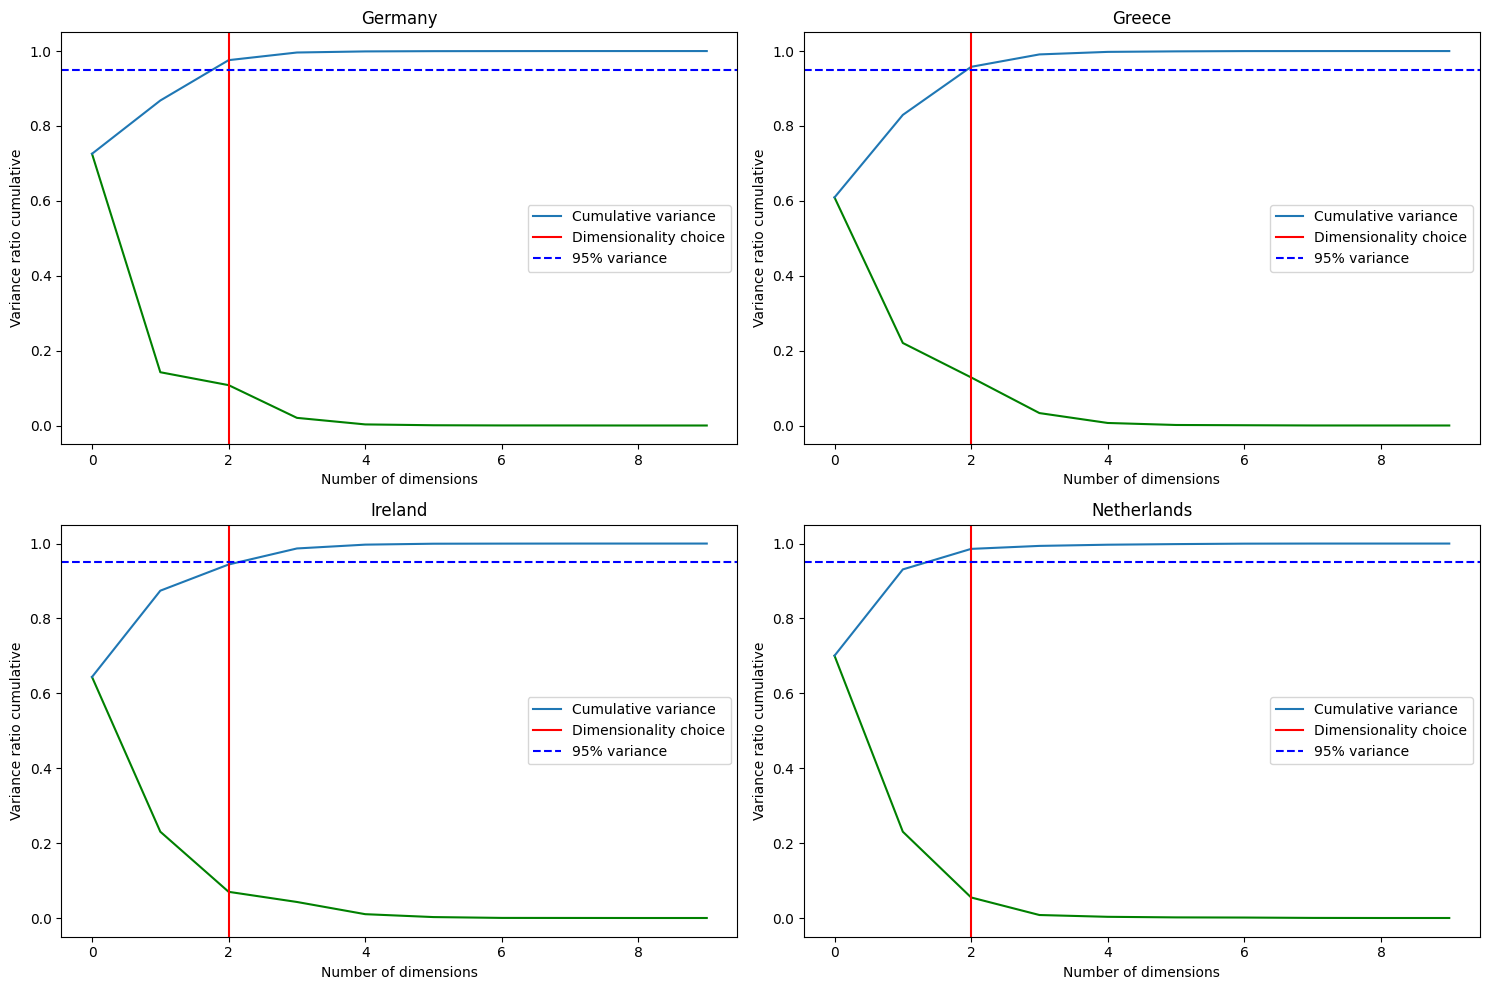

In [177]:
countries = ESG_denoised['country'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for index, country in enumerate(countries):
    country_data = ESG_denoised[ESG_denoised['country'] == country]
    country_data_scaled = country_data.drop(columns=['country', 'date', 'gdppc'])
    
    scaler_standard = StandardScaler()
    country_data_scaled = scaler_standard.fit_transform(country_data_scaled)
    
    pca = PCA().fit(country_data_scaled)
    
    axes[index].plot(pca.explained_variance_ratio_, color='g') 
    axes[index].plot(pca.explained_variance_ratio_.cumsum(), label='Cumulative variance') 
    axes[index].set_xlabel('Number of dimensions')
    axes[index].set_ylabel('Variance ratio cumulative')
    axes[index].set_title(f'{country}')
    axes[index].axvline(2, color='r', label='Dimensionality choice') 
    axes[index].axhline(0.95, color='b', linestyle= '--', label='95% variance') 
    axes[index].legend()

plt.tight_layout()
plt.show()


In [178]:
# For each country do a separate PCA 
PCA_total = []  
for country in ESG_denoised['country'].unique():
    country_data = ESG_denoised[ESG_denoised['country'] == country]
    country_data_scaled = country_data.drop(columns=['country', 'date', 'gdppc'])
    
    scaler_standard = StandardScaler()
    country_data_scaled = scaler_standard.fit_transform(country_data_scaled)

    pca = PCA(n_components=2).fit(country_data_scaled)
    country_pca = pca.transform(country_data_scaled)
    
    PCA_percountry = pd.DataFrame(data=country_pca, columns=['pca1','pca2'])
    PCA_percountry['country'] = country
    PCA_percountry['date'] = country_data['date'].values
    PCA_percountry['gdppc'] = country_data['gdppc'].values
    
    PCA_total.append(PCA_percountry)

PCA_columns=['pca1','pca2']
# Merge the PCA's per country in a dataframe
ESG_pca_df = pd.concat(PCA_total, ignore_index=True)
ESG_pca_df.head()

pca1      pca2  country  date         gdppc
0  5.996098  2.369383  Germany  2020  47941.801415
1  4.537602  1.321426  Germany  2019  46800.350744
2  3.079106  0.273468  Germany  2018  45658.900073
3  1.735894 -0.845695  Germany  2017  44524.986290
4  1.304738 -0.998890  Germany  2016  44771.022934

### Functions for retrieving results

This code defines the results function, which calculates and displays key regression evaluation metrics, including RMSE, R2, and MAE. It is used to assess the performance of machine learning models for different countries, providing a quick summary of prediction accuracy.

In [179]:
# function to get the results fastly per country 
def results(y_test, y_predict, method, country): 
    MSE = mean_squared_error(y_test, y_predict) 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(y_test, y_predict)
    MAE = mean_absolute_error(y_test, y_predict)
    return print(f'{method}, {country}: the RMSE is {RMSE}, and R2 is {R2}, and MAE is {MAE}')


In [180]:
def get_metric(y_test, y_predict): 
    MSE = mean_squared_error(y_test, y_predict) 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(y_test, y_predict)
    MAE = mean_absolute_error(y_test, y_predict)
    return MSE, RMSE, R2, MAE

### K fold cross validation

K-fold cross-validation is a widely used technique in machine learning for assessing the predictive models, like ours. It is particularly useful when working with limited data and we only have 20 years of data. The key idea is to divide the available data into 'K' equally-sized subsets, or 'folds.' In our model, these are subsets of 4 years each. The model is trained and tested 5 times, each time using a different fold, or different 4 years, as the test set and the remaining folds for training. This process helps ensure that the model's performance is not dependent on a specific train-test split, making it a valuable tool for assessing its stability and accuracy.

In [181]:
def cross_validate_train_test_sets(data, pca_columns, K_subset): 
    dates = sorted(data['date'].unique())
    nr_dates = len(dates)
    subset_size = int(nr_dates / K_subset)
    shuffle_data = []

    for shuffle in range(K_subset):
        start = shuffle * subset_size
        test_dates = dates[shuffle * subset_size:start + subset_size]
        train_dates = [date for date in dates if date not in test_dates]
        
        X_train = data[data['date'].isin(train_dates)][pca_columns]
        y_train = data[data['date'].isin(train_dates)]['gdppc']
        X_test = data[data['date'].isin(test_dates)][pca_columns]
        y_test = data[data['date'].isin(test_dates)]['gdppc']

        shuffle_data.append((X_train, y_train, X_test, y_test)) 

    return shuffle_data


## Random Forest

In [182]:
def RandomForest_per__country(country, ESG_pca_df, PCA_columns):
    predict_RF = []
    real_RF = []
    RMSE_RF = []
    MAE_RF = []
    K_subset = 5
    shuffled = cross_validate_train_test_sets(ESG_pca_df[ESG_pca_df['country'] == country], PCA_columns, K_subset)

    for shuffle in range(K_subset):   
        X_train, y_train, X_test, y_test = shuffled[shuffle]

        random_forest_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
        random_forest_model.fit(X_train, y_train)
        y_predict_rf = random_forest_model.predict(X_test) 
        predict_RF.append(y_predict_rf)
        real_RF.append(y_test) 

        results(y_test, y_predict_rf, 'Random Forest', country) 
        MSE, RMSE, R2, MAE = get_metric(y_test, y_predict_rf)
        RMSE_RF.append(RMSE)
        MAE_RF.append(MAE)

    RMSE_mean_RF = np.mean(RMSE_RF)
    MAE_mean_RF = np.mean(MAE_RF) 
    
    return predict_RF, real_RF, RMSE_mean_RF, MAE_mean_RF

Alpha Lambda plot for the visualization of the predicted gdppc with an alpha of 20%

Random Forest, Germany: the RMSE is 13314.498592336144, and R2 is -15.691519632158169, and MAE is 12595.449194455137
Random Forest, Germany: the RMSE is 2108.6546367928236, and R2 is 0.09703247867044673, and MAE is 1786.4291720795627


Random Forest, Germany: the RMSE is 1287.6783605977128, and R2 is -2.485306137441391, and MAE is 1167.9867141042596
Random Forest, Germany: the RMSE is 1233.5896067336546, and R2 is -11.439662286423657, and MAE is 1086.2336888384416
Random Forest, Germany: the RMSE is 7760.035138195418, and R2 is -36.121387063930314, and MAE is 6610.2887160068385
Random Forest, Greece: the RMSE is 8679.777593176637, and R2 is -7.351556353853709, and MAE is 8118.586874656396
Random Forest, Greece: the RMSE is 7519.296702221644, and R2 is -13.852141862289173, and MAE is 7274.744734564099
Random Forest, Greece: the RMSE is 1513.5252185735171, and R2 is 0.39568092802580146, and MAE is 1296.2887593035002
Random Forest, Greece: the RMSE is 1150.2455495617432, and R2 is -0.3685779442086512, and MAE is 1092.502148657969
Random Forest, Greece: the RMSE is 2866.865842794979, and R2 is -6527.78989327659, and MAE is 2563.9961777337503
Random Forest, Ireland: the RMSE is 27014.491468564338, and R2 is -16.4100842591

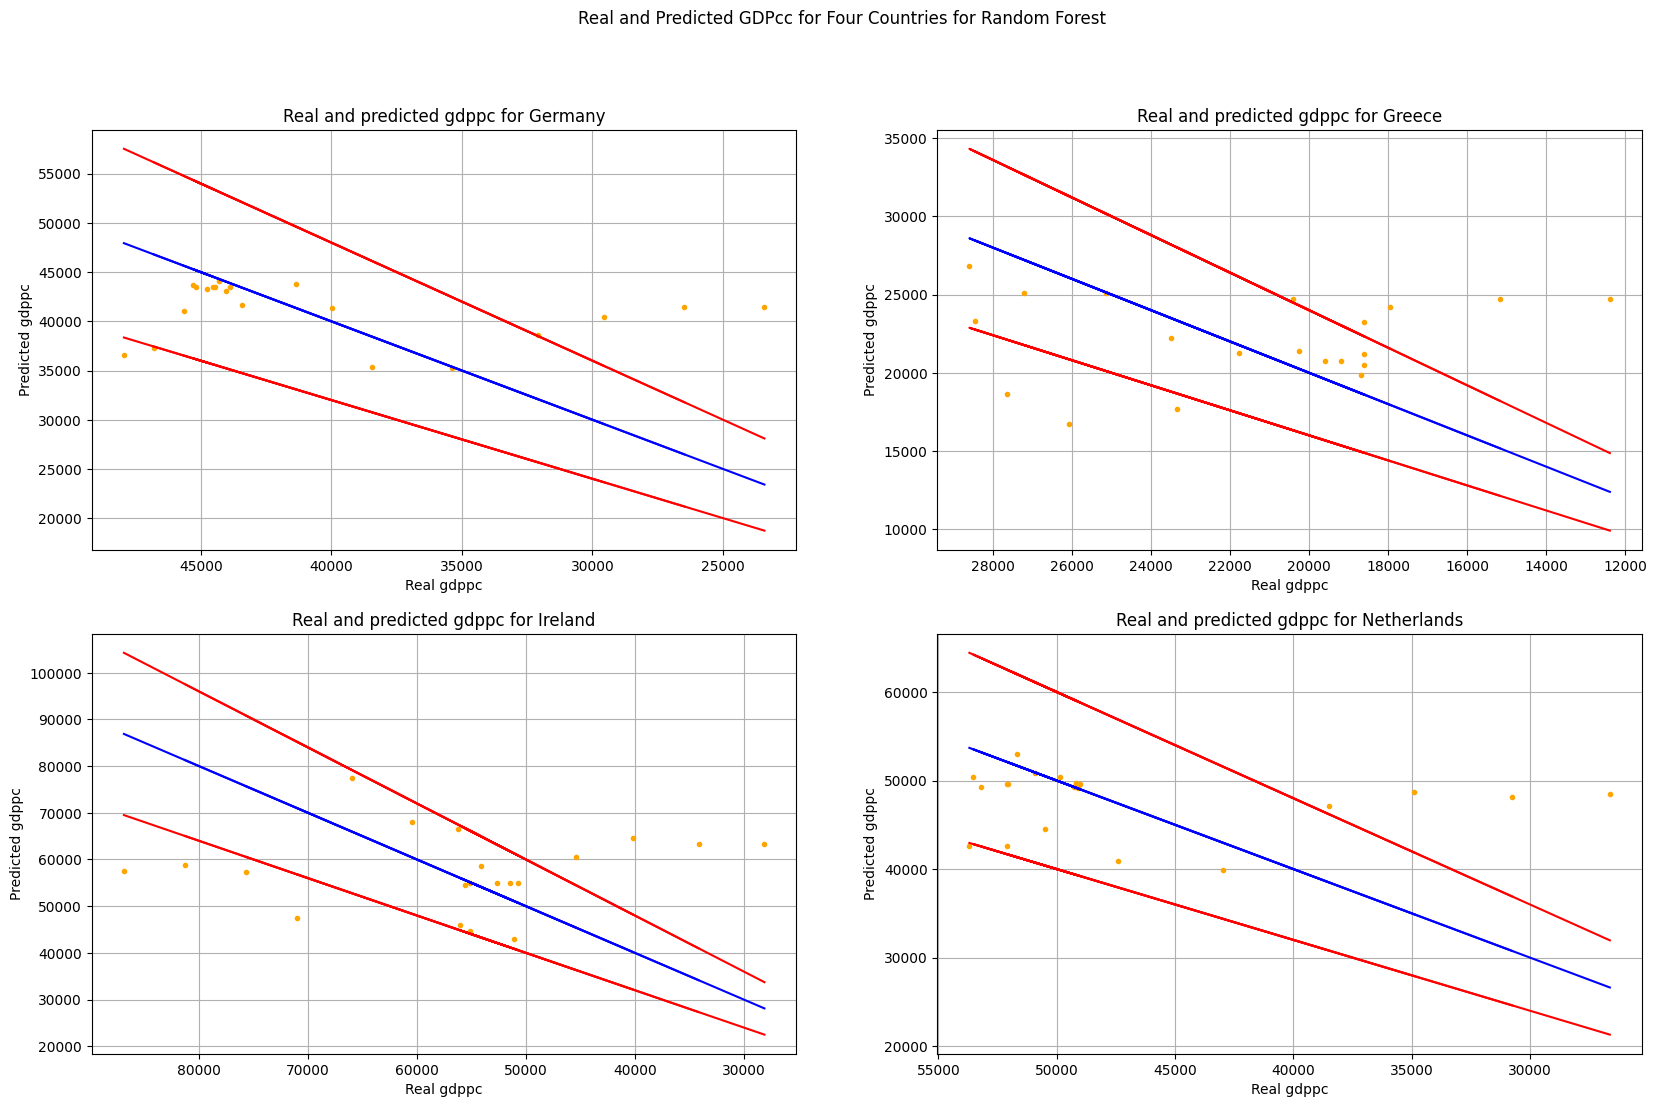

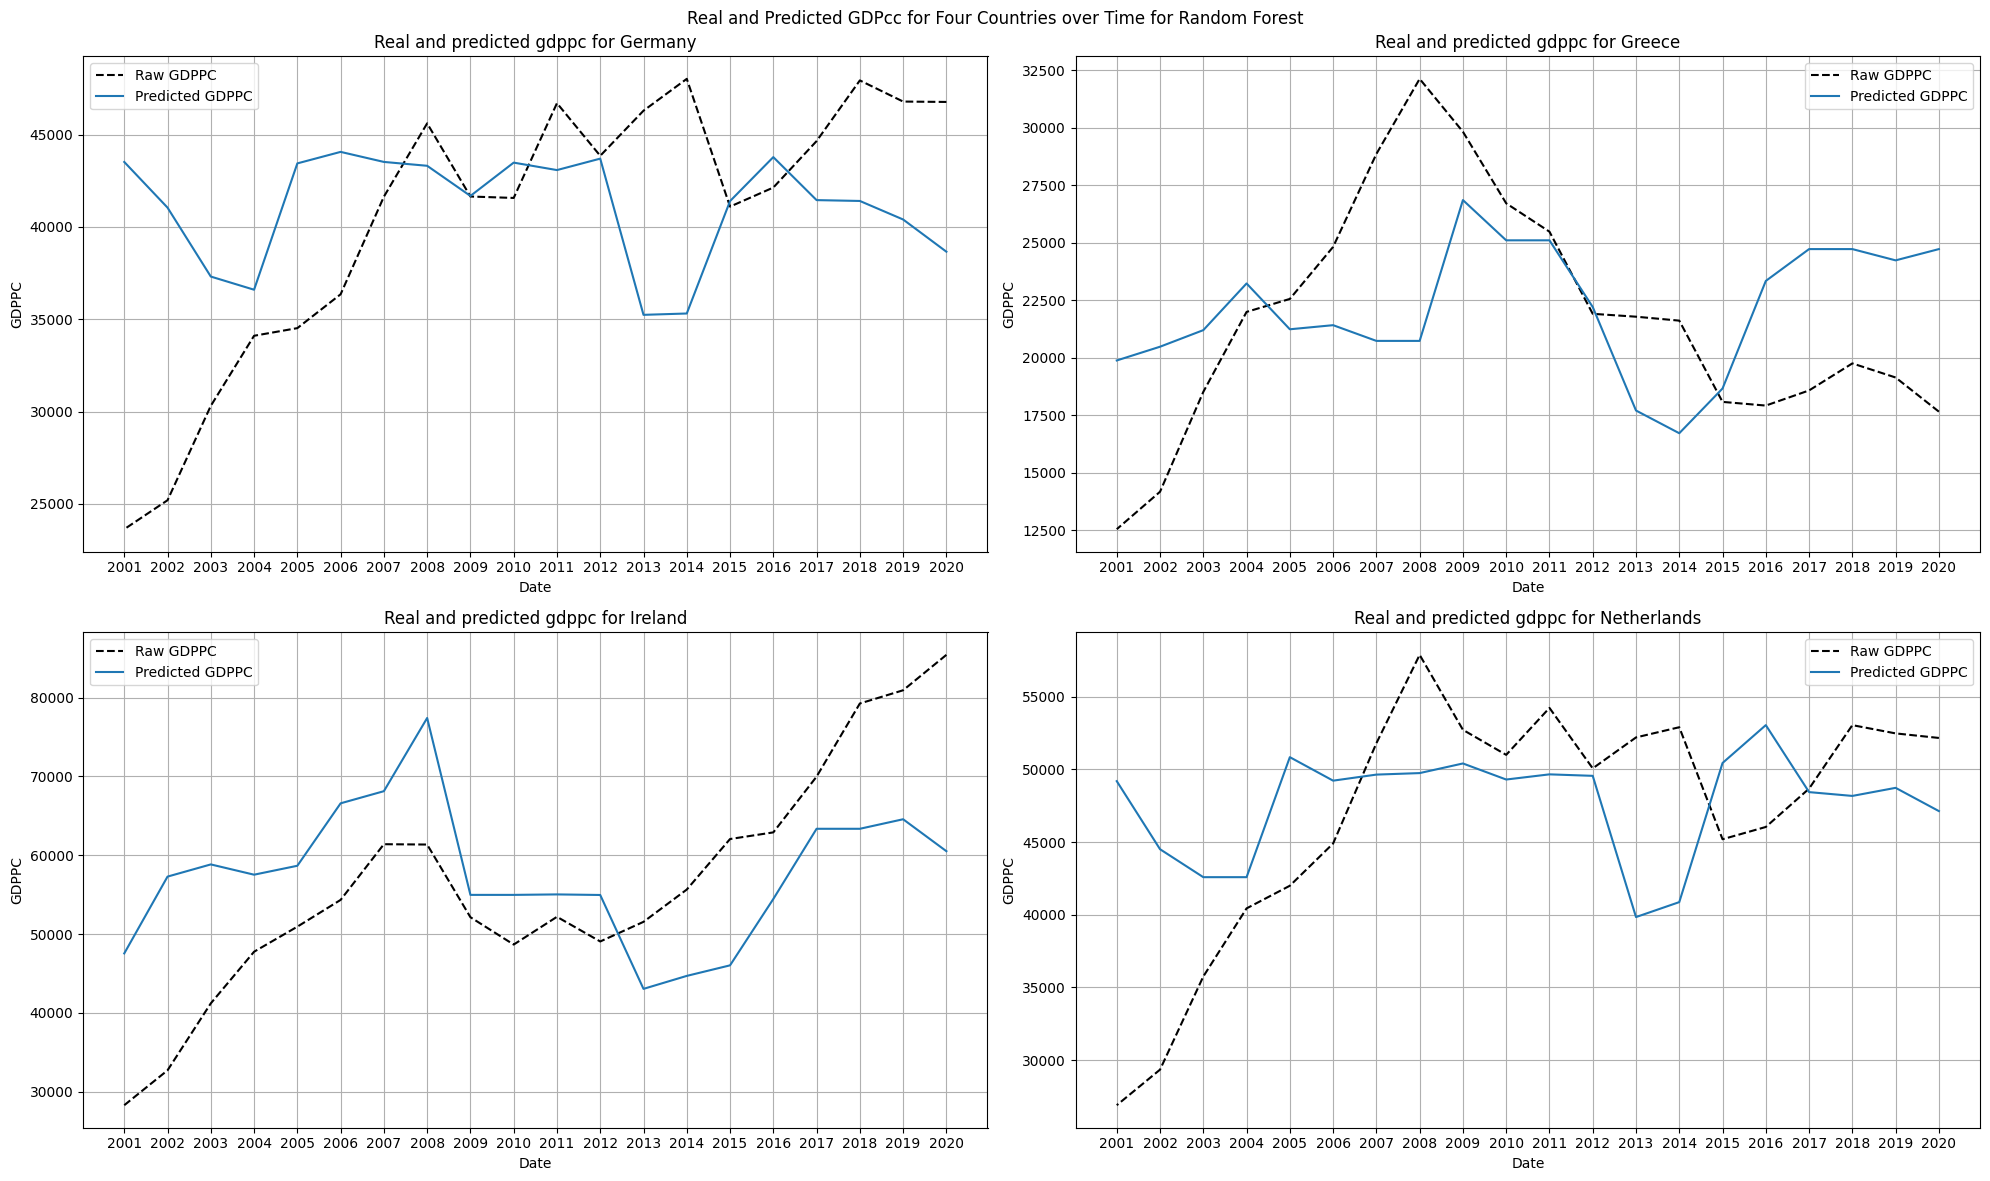

In [183]:
fig1, axs1 = plt.subplots(2, 2, figsize=(20, 12))
fig1.suptitle('Real and Predicted GDPcc for Four Countries for Random Forest')
subplot_index = [(0,0), (0,1), (1,0), (1,1)]
RMSE_mean_RF_all = []
MAE_mean_RF_all = []

fig2, axs2 = plt.subplots(2, 2, figsize=(20, 12))
fig2.suptitle('Real and Predicted GDPcc for Four Countries over Time for Random Forest')

for index, country in enumerate(ESG_denoised['country'].unique()):
    predict_RF, real_RF, RMSE_mean_RF, MAE_mean_RF = RandomForest_per__country(country, ESG_pca_df, PCA_columns)
    RMSE_mean_RF_all.append(RMSE_mean_RF)
    MAE_mean_RF_all.append(MAE_mean_RF)

    # For the alpha lambda plot
    alpha = 0.2
    real_RF_np = np.array(real_RF)
    upper_bound = real_RF_np * (1 + alpha)
    lower_bound = real_RF_np * (1 - alpha)

    ax1 = axs1[subplot_index[index]]  
    ax1.plot(real_RF, predict_RF, '.', color='orange')
    ax1.plot(real_RF, real_RF, 'b-')
    ax1.plot(real_RF, upper_bound, 'r-')
    ax1.plot(real_RF, lower_bound, 'r-')
    ax1.invert_xaxis()
    ax1.set_title(f'Real and predicted gdppc for {country}')
    ax1.set_xlabel('Real gdppc')
    ax1.set_ylabel('Predicted gdppc')
    ax1.grid(True)

    # For the time series plot
    ax2 = axs2[subplot_index[index]]  
    ax2.plot(ESG[ESG['country'] == country]['date'], ESG[ESG['country'] == country]['gdppc'], 'k--', label = 'Raw GDPPC')
    ax2.plot(ESG[ESG['country'] == country]['date'], np.concatenate(predict_RF), label = 'Predicted GDPPC')

    dates = ESG[ESG['country'] == country]['date']
    ax2.set_xticks(dates)

    ax2.set_title(f'Real and predicted gdppc for {country}')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('GDPPC')
    ax2.legend()
    ax2.grid(True)

plt.tight_layout()
plt.show()

## Linear Regression

In [184]:
def LinearRegression_per__country(country, ESG_pca_df, PCA_columns):
    predict_LR = []
    real_LR = []
    RMSE_LR = []
    MAE_LR = []
    K_subset = 5
    shuffled = cross_validate_train_test_sets(ESG_pca_df[ESG_pca_df['country'] == country], PCA_columns, K_subset)

    for shuffle in range(K_subset):   
        X_train, y_train, X_test, y_test = shuffled[shuffle]

        linear_regression_model = LinearRegression()
        linear_regression_model.fit(X_train, y_train)
        y_predict_LR = linear_regression_model.predict(X_test) 
        predict_LR.append(y_predict_LR)
        real_LR.append(y_test) 

        results(y_test, y_predict_LR, 'Linear Regression', country) 
        MSE, RMSE, R2, MAE = get_metric(y_test, y_predict_LR)

        RMSE_LR.append(RMSE)
        MAE_LR.append(MAE)

    RMSE_mean_LR = np.mean(RMSE_LR)
    MAE_mean_LR = np.mean(MAE_LR) 
    
    return predict_LR, real_LR, RMSE_mean_LR, MAE_mean_LR

Linear Regression, Germany: the RMSE is 5048.403637299806, and R2 is -1.3996858317717233, and MAE is 4896.758134110553
Linear Regression, Germany: the RMSE is 1607.9527759283535, and R2 is 0.4749413728967752, and MAE is 1347.6894755672674
Linear Regression, Germany: the RMSE is 1659.5484686580312, and R2 is -4.789032903126205, and MAE is 1425.7330992876305
Linear Regression, Germany: the RMSE is 988.7407117250137, and R2 is -6.991568388663201, and MAE is 841.0491600569276
Linear Regression, Germany: the RMSE is 2348.298559626236, and R2 is -2.399409184084725, and MAE is 2339.376404980374
Linear Regression, Greece: the RMSE is 10796.07925365761, and R2 is -11.920590124728902, and MAE is 10367.086707814971
Linear Regression, Greece: the RMSE is 7211.397630180305, and R2 is -12.660718140485685, and MAE is 7156.490070901161
Linear Regression, Greece: the RMSE is 2637.9212729917244, and R2 is -0.8357377450600869, and MAE is 2211.8507929893576
Linear Regression, Greece: the RMSE is 2598.4901

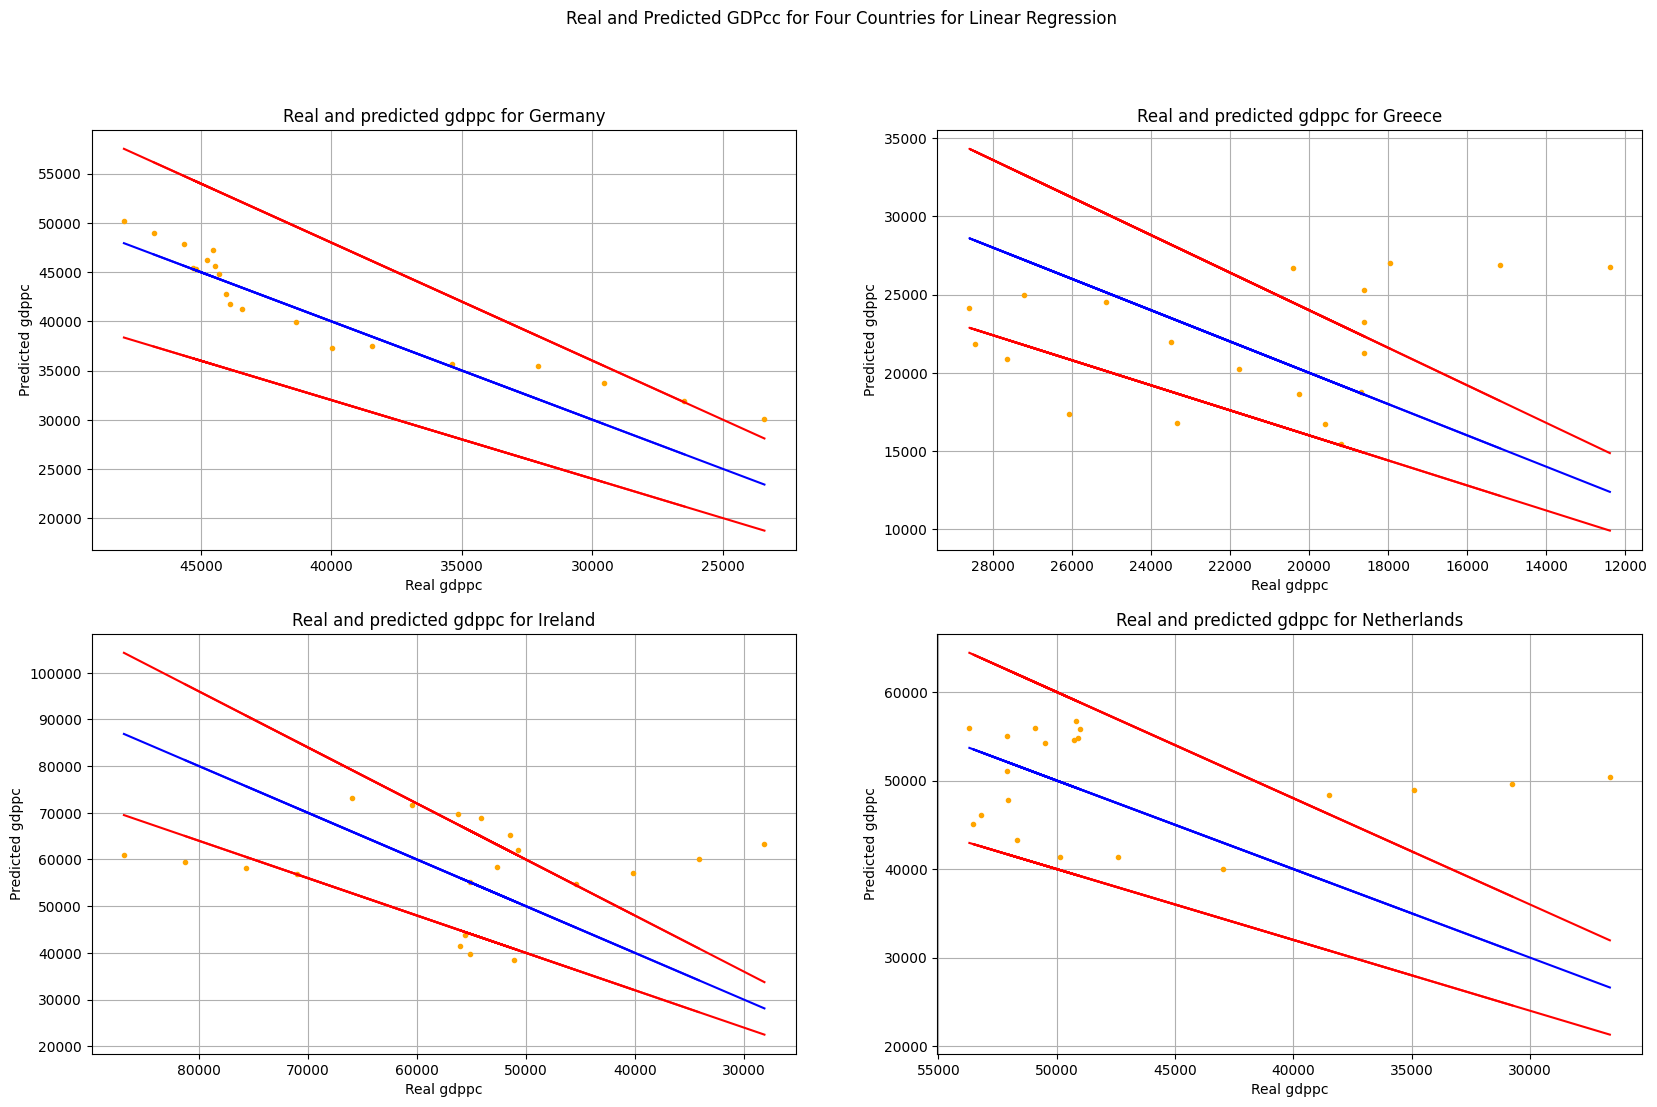

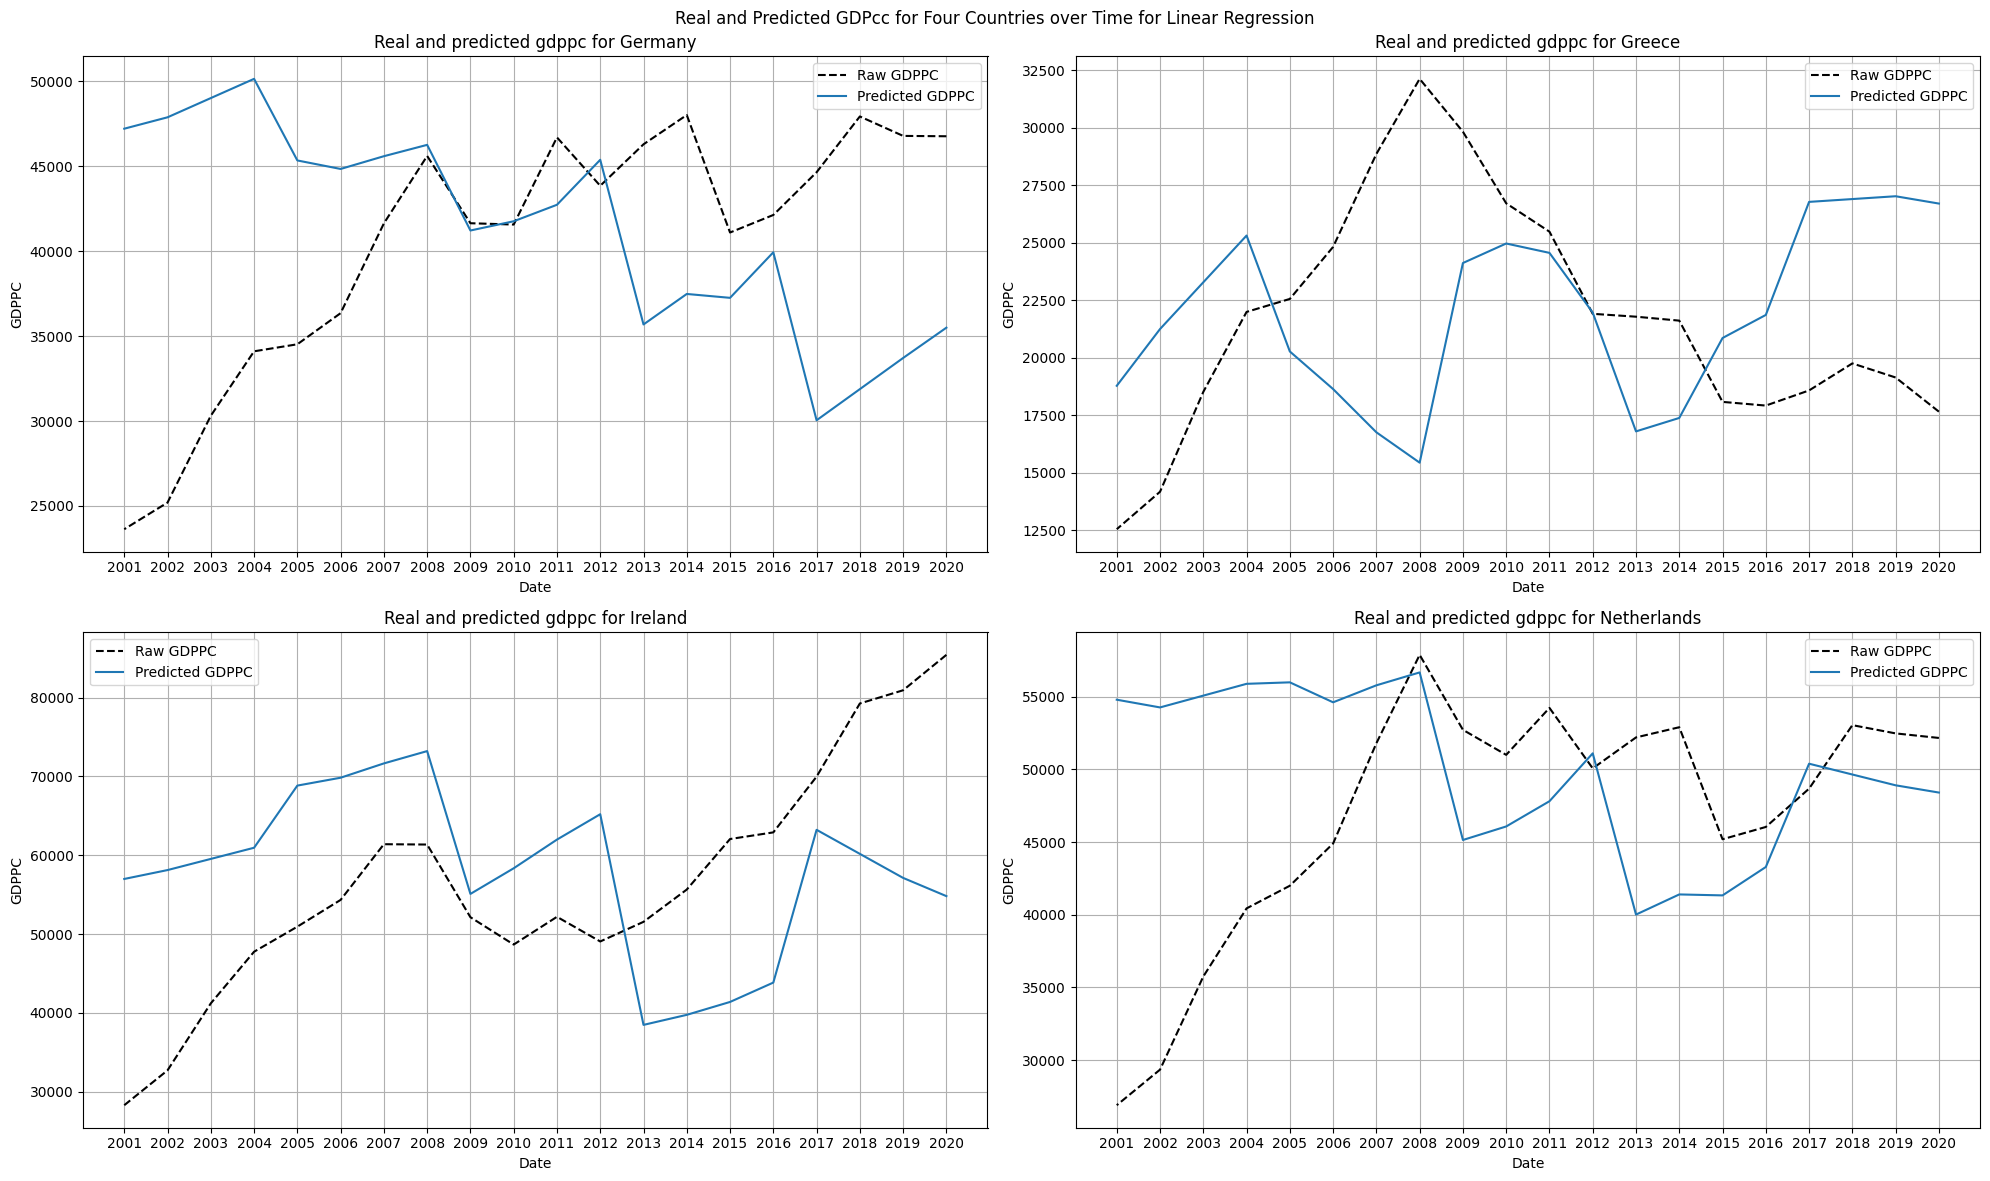

In [185]:
fig1, axs1 = plt.subplots(2, 2, figsize=(20, 12))
fig1.suptitle('Real and Predicted GDPcc for Four Countries for Linear Regression')
subplot_index = [(0,0), (0,1), (1,0), (1,1)]
RMSE_mean_LR_all = []
MAE_mean_LR_all = []

fig2, axs2 = plt.subplots(2, 2, figsize=(20, 12))
fig2.suptitle('Real and Predicted GDPcc for Four Countries over Time for Linear Regression')

for index, country in enumerate(ESG_denoised['country'].unique()):
    predict_LR, real_LR, RMSE_mean_LR, MAE_mean_LR = LinearRegression_per__country(country, ESG_pca_df, PCA_columns)
    RMSE_mean_LR_all.append(RMSE_mean_LR)
    MAE_mean_LR_all.append(MAE_mean_LR)

    # For the alpha lambda plot
    alpha = 0.2
    real_LR_np = np.array(real_LR)
    upper_bound = real_LR_np * (1 + alpha)
    lower_bound = real_LR_np * (1 - alpha)

    ax1 = axs1[subplot_index[index]]  
    ax1.plot(real_LR, predict_LR, '.', color='orange')
    ax1.plot(real_LR, real_LR, 'b-')
    ax1.plot(real_LR, upper_bound, 'r-')
    ax1.plot(real_LR, lower_bound, 'r-')
    ax1.invert_xaxis()
    ax1.set_title(f'Real and predicted gdppc for {country}')
    ax1.set_xlabel('Real gdppc')
    ax1.set_ylabel('Predicted gdppc')
    ax1.grid(True)

    # For the time series plot
    ax2 = axs2[subplot_index[index]]  
    ax2.plot(ESG[ESG['country'] == country]['date'], ESG[ESG['country'] == country]['gdppc'], 'k--', label = 'Raw GDPPC')
    ax2.plot(ESG[ESG['country'] == country]['date'], np.concatenate(predict_LR), label = 'Predicted GDPPC')

    dates = ESG[ESG['country'] == country]['date']
    ax2.set_xticks(dates)

    ax2.set_title(f'Real and predicted gdppc for {country}')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('GDPPC')
    ax2.legend()
    ax2.grid(True)

plt.tight_layout()
plt.show()


## MLP Neural Network

For the MLP, three layers are chosen with size 32, 64, 64.

In [186]:
def MLP_per__country(country, ESG_pca_df, PCA_columns):
    predict_MLP = []
    real_MLP = []
    RMSE_MLP = []
    MAE_MLP = []
    K_subset = 5
    shuffled = cross_validate_train_test_sets(ESG_pca_df[ESG_pca_df['country'] == country], PCA_columns, K_subset)

    for shuffle in range(K_subset):   
        X_train, y_train, X_test, y_test = shuffled[shuffle]

        MLP_model = MLPRegressor(hidden_layer_sizes=(32, 64, 64), activation='relu', solver='adam', max_iter= 5000)
        MLP_model.fit(X_train, y_train)
        y_predict_MLP = MLP_model.predict(X_test) 
        predict_MLP.append(y_predict_MLP)
        real_MLP.append(y_test) 

        results(y_test, y_predict_MLP, 'MLP neural network', country) 
        MSE, RMSE, R2, MAE = get_metric(y_test, y_predict_MLP)
        RMSE_MLP.append(RMSE)
        MAE_MLP.append(MAE)

    RMSE_mean_MLP = np.mean(RMSE_MLP)
    MAE_mean_MLP = np.mean(MAE_MLP)

    return predict_MLP, real_MLP, RMSE_mean_MLP, MAE_mean_MLP

MLP neural network, Germany: the RMSE is 17188.47372633195, and R2 is -26.817677935557832, and MAE is 15801.726600160364
MLP neural network, Germany: the RMSE is 4902.81869479597, and R2 is -3.8814954174786127, and MAE is 3876.19784359366
MLP neural network, Germany: the RMSE is 1436.8630523327895, and R2 is -3.339671850075174, and MAE is 1365.0795849716797
MLP neural network, Germany: the RMSE is 980.2552775269413, and R2 is -6.854988709454984, and MAE is 832.3912518275538
MLP neural network, Germany: the RMSE is 4753.146572290093, and R2 is -12.927053167474046, and MAE is 3792.434898631185
MLP neural network, Greece: the RMSE is 10061.963237133283, and R2 is -10.223173431748565, and MAE is 9589.229511605465
MLP neural network, Greece: the RMSE is 6133.911923918225, and R2 is -8.883476100759209, and MAE is 5913.551841212451
MLP neural network, Greece: the RMSE is 1417.2164186340613, and R2 is 0.47014220554418606, and MAE is 1227.9061304938987
MLP neural network, Greece: the RMSE is 97

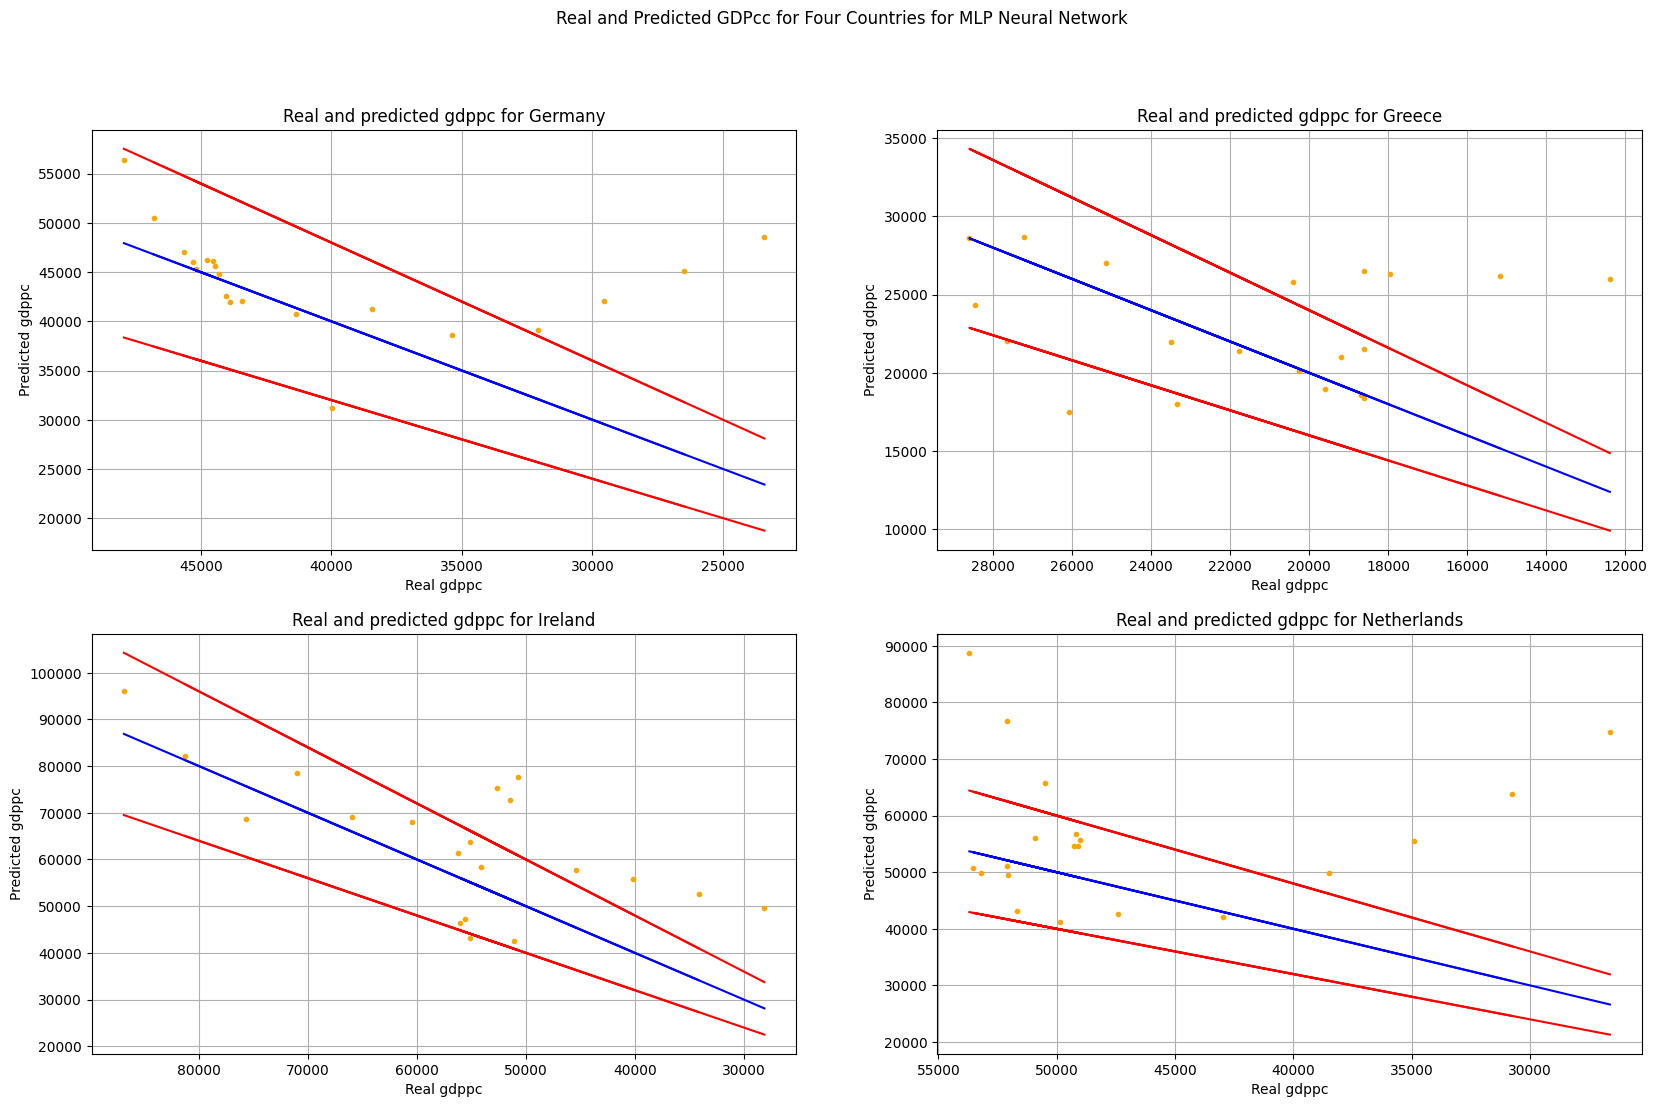

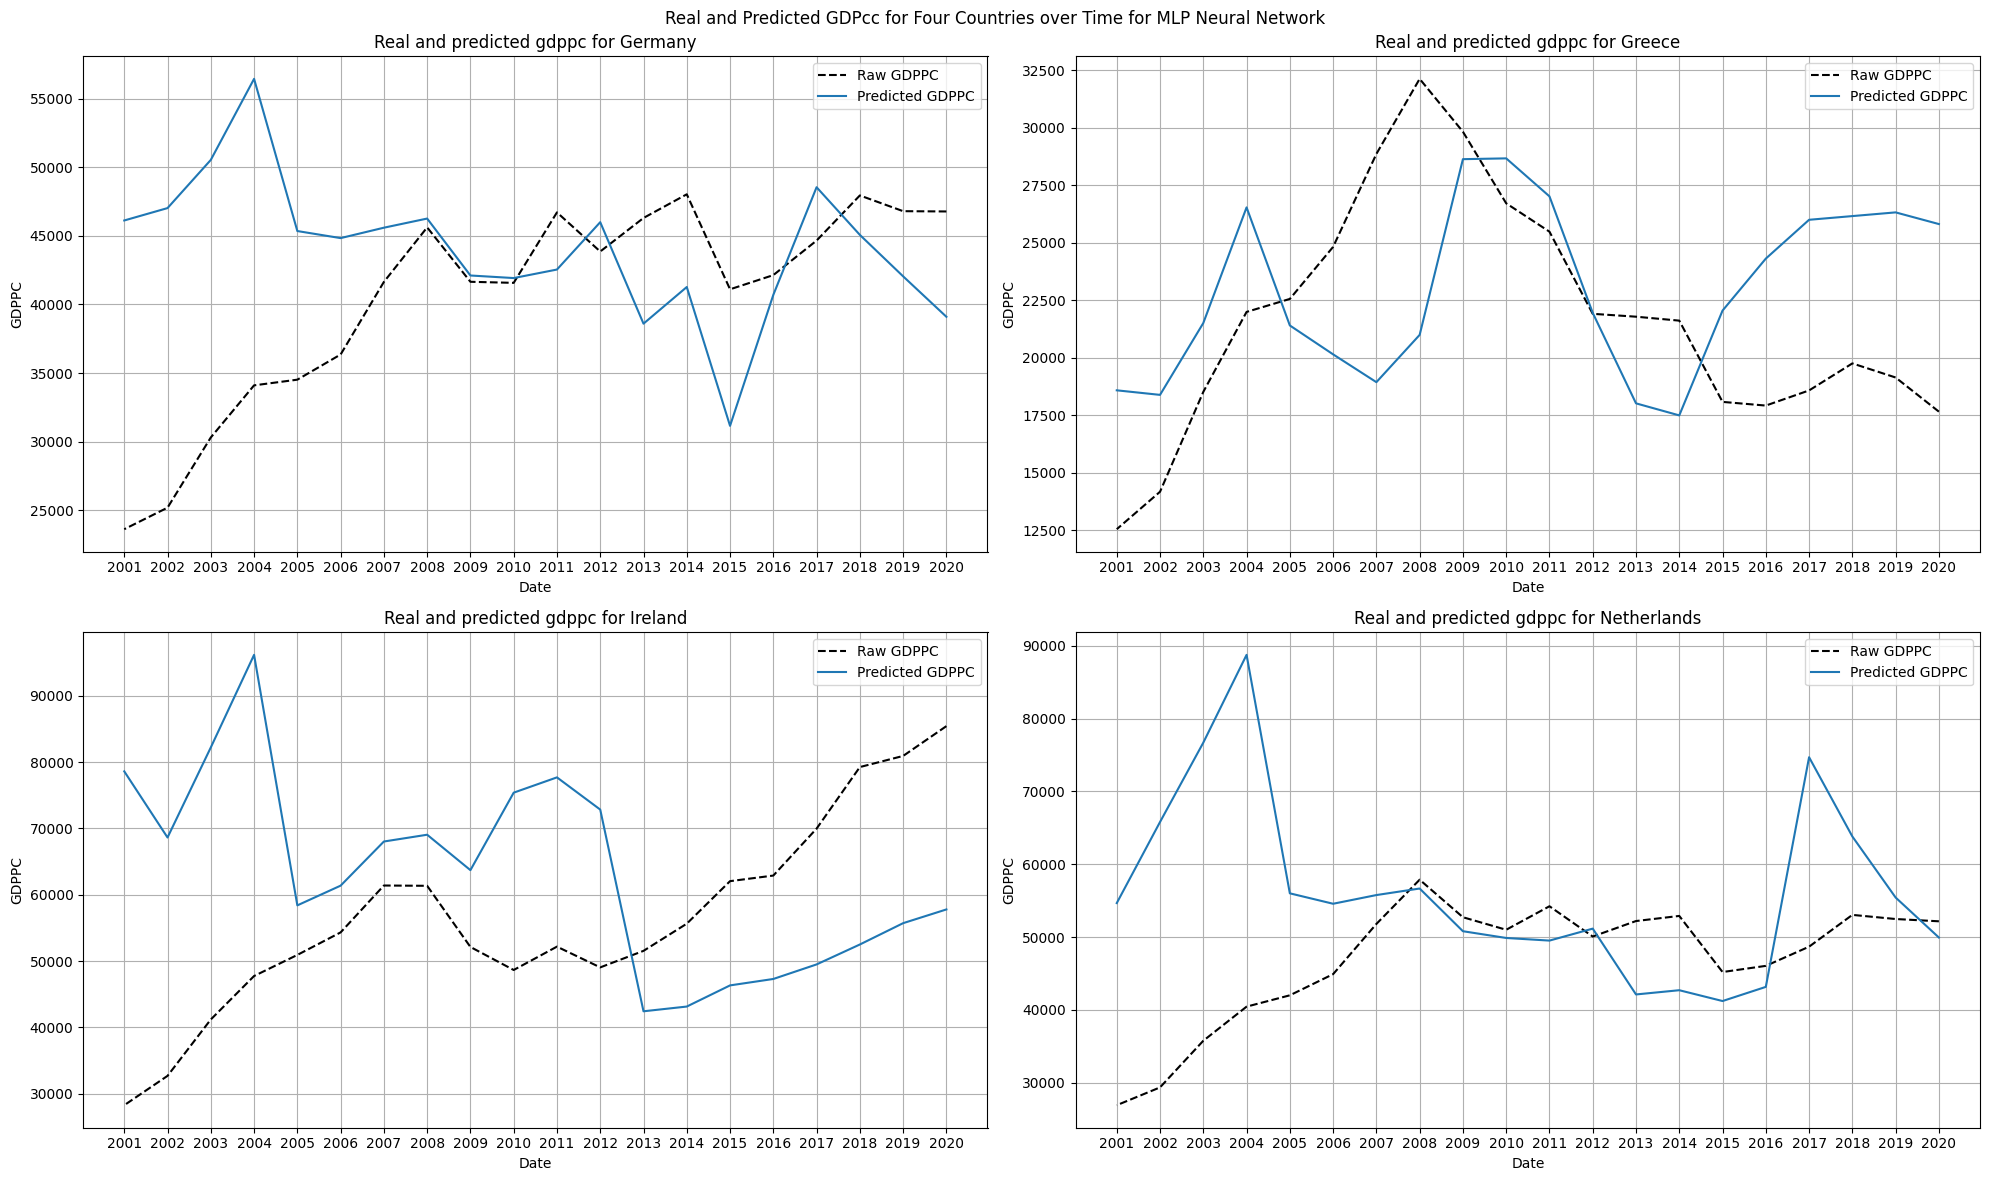

In [187]:
fig1, axs1 = plt.subplots(2, 2, figsize=(20, 12))
fig1.suptitle('Real and Predicted GDPcc for Four Countries for MLP Neural Network')
subplot_index = [(0,0), (0,1), (1,0), (1,1)]
RMSE_mean_MLP_all = []
MAE_mean_MLP_all = []

fig2, axs2 = plt.subplots(2, 2, figsize=(20, 12))
fig2.suptitle('Real and Predicted GDPcc for Four Countries over Time for MLP Neural Network')

for index, country in enumerate(ESG_denoised['country'].unique()):
    predict_MLP, real_MLP, RMSE_mean_MLP, MAE_mean_MLP = MLP_per__country(country, ESG_pca_df, PCA_columns)
    RMSE_mean_MLP_all.append(RMSE_mean_MLP)
    MAE_mean_MLP_all.append(MAE_mean_MLP) 

    # For the alpha lambda plot
    alpha = 0.2
    real_MLP_np = np.array(real_MLP)
    upper_bound = real_MLP_np * (1 + alpha)
    lower_bound = real_MLP_np * (1 - alpha)

    ax1 = axs1[subplot_index[index]]  
    ax1.plot(real_MLP, predict_MLP, '.', color='orange')
    ax1.plot(real_MLP, real_MLP, 'b-')
    ax1.plot(real_MLP, upper_bound, 'r-')
    ax1.plot(real_MLP, lower_bound, 'r-')
    ax1.invert_xaxis()
    ax1.set_title(f'Real and predicted gdppc for {country}')
    ax1.set_xlabel('Real gdppc')
    ax1.set_ylabel('Predicted gdppc')
    ax1.grid(True)

    # For the time series plot
    ax2 = axs2[subplot_index[index]]  
    ax2.plot(ESG[ESG['country'] == country]['date'], ESG[ESG['country'] == country]['gdppc'], 'k--', label = 'Raw GDPPC')
    ax2.plot(ESG[ESG['country'] == country]['date'], np.concatenate(predict_MLP), label = 'Predicted GDPPC')

    dates = ESG[ESG['country'] == country]['date']
    ax2.set_xticks(dates)

    ax2.set_title(f'Real and predicted gdppc for {country}')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('GDPPC')
    ax2.legend()
    ax2.grid(True)

plt.tight_layout()
plt.show()


## 4: Interim Results

This chapter will elobate the results of the three machine learning models to predict the GDP based on the ESG indicators together. The models have predicited the GDP by implementing the k-fold cross validation. Every iteration, the test set data shifted four years, for example, in the first fold, the years 2001, 2002, 2003, and 2004 were used as test data. In the next fold the years 2005, 2006, 2007, and 2008 etc. The mean of the metric are generated over the 5 folds to get the results underneath. 

There can be seen through the data of the above table that the Random Forest performs overall the best. It depends strongly per country, however, to evaluate on the machine learning models in order to look in the ESG pillar separately, the Random Forest has been chosen. In the next chapter, the ESG pillars will be evaluated separately per country to make prediction for the last 4 years of the dataset.


In [188]:
countries = ['Germany', 'Greece', 'Ireland', 'Netherlands']

df_ML_results = pd.DataFrame({
    'Random Forest - MAE': MAE_mean_RF_all,
    'Random Forest - RMSE': RMSE_mean_RF_all,
    'Linear Regression - MAE': MAE_mean_LR_all,
    'Linear Regression - RMSE': RMSE_mean_LR_all,
    'Neural Network - MAE': MAE_mean_MLP_all,
    'Neural Network - RMSE': RMSE_mean_MLP_all
}, index=countries)

averages = df_ML_results.mean(axis=0)
df_ML_results.loc['Average'] = averages

df_ML_results


Random Forest - MAE  Random Forest - RMSE  \
Germany              4649.277497           5140.891267   
Greece               4069.223739           4345.942181   
Ireland             13586.512678          14201.977057   
Netherlands          5664.456560           6245.620943   
Average              6992.367618           7483.607862   

             Linear Regression - MAE  Linear Regression - RMSE  \
Germany                  2170.121255               2330.588831   
Greece                   5137.058491               5506.549960   
Ireland                 14942.138127              15862.464352   
Netherlands              7626.974725               8069.692305   
Average                  7469.073150               7942.323862   

             Neural Network - MAE  Neural Network - RMSE  
Germany               5133.566036            5852.311465  
Greece                4050.991213            4562.143682  
Ireland              11550.175283           12071.766746  
Netherlands          12530.280821           13936.099469  
Average               8316.253338            9105.580340

## 5: Analysis per ESG pillar

The Random Forest will be used to further deep-dive into the interrelation between the ESG pillars (or categories) and GDP. Each pillar will be evaluated by implementing a Random Forest separately per pillar and per country. 

In [189]:
indicators_social = ['Health Expenditure', 'Life Expectancy at Birth', 'Child Mortality', 'Indicence of Diseases']
indicators_env = ['GHG', 'Renewable', 'Energy efficiency']
indicators_economy = ['Export', 'Import', 'Freight']

indicator_groups = {
    'social': indicators_social,
    'environment': indicators_env,
    'economy': indicators_economy
}

PCA_total = []

for country in ESG_denoised['country'].unique():
    country_data = ESG_denoised[ESG_denoised['country'] == country]
    merged_data = country_data[['country', 'date', 'gdppc']].copy()
    merged_data = merged_data.reset_index(drop=True)

    for group, indicators in indicator_groups.items():
        country_data_group = country_data[indicators]
        
        scaler_standard = StandardScaler()
        country_data_scaled = scaler_standard.fit_transform(country_data_group)

        pca = PCA(n_components=2).fit(country_data_scaled)
        country_pca = pca.transform(country_data_scaled)

        PCA_percountry = pd.DataFrame(data=country_pca, columns=[f'pca1_{group}', f'pca2_{group}'])

        merged_data = pd.concat([merged_data, PCA_percountry], axis=1)
    PCA_total.append(merged_data)

# Merge the PCA's per country in a dataframe
ESG_pca_df_perESG = pd.concat(PCA_total, ignore_index=True)
ESG_pca_df_perESG.head()

country  date         gdppc  pca1_social  pca2_social  pca1_environment  \
0  Germany  2020  47941.801415    -3.030834    -0.621470          3.629551   
1  Germany  2019  46800.350744    -2.447899    -0.695303          2.867539   
2  Germany  2018  45658.900073    -1.864963    -0.769136          2.105528   
3  Germany  2017  44524.986290    -1.346002    -0.784865          1.501242   
4  Germany  2016  44771.022934    -1.175840    -0.620578          1.193572   

   pca2_environment  pca1_economy  pca2_economy  
0          0.511276      4.303858     -0.109303  
1          0.289289      2.739721      0.041283  
2          0.067302      1.175584      0.191869  
3         -0.117893     -0.446947      0.335658  
4         -0.128253     -0.732920      0.461872

### Random Forest for ESG pillars separately

In [190]:
def RandomForest_per__country_ESG(country, ESG_pca_df, PCA_columns):
    predict_RF = []
    real_RF = []
    RMSE_RF = []
    MAE_RF = []
    K_subset = 5
    shuffled = cross_validate_train_test_sets(ESG_pca_df[ESG_pca_df['country'] == country], PCA_columns, K_subset)

    for shuffle in range(K_subset): 
            X_train, y_train, X_test, y_test = shuffled[shuffle]
        
            random_forest_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
            random_forest_model.fit(X_train, y_train)
            y_predict_rf = random_forest_model.predict(X_test) 
            predict_RF.append(y_predict_rf)
            real_RF.append(y_test) 

            # results(y_test, y_predict_rf, 'Random Forest', country) 
            MSE, RMSE, R2, MAE = get_metric(y_test, y_predict_rf)
            RMSE_RF.append(RMSE)
            MAE_RF.append(MAE)

    RMSE_mean_RF = np.mean(RMSE_RF)
    MAE_mean_RF = np.mean(MAE_RF) 
    
    return predict_RF, real_RF, RMSE_mean_RF, MAE_mean_RF

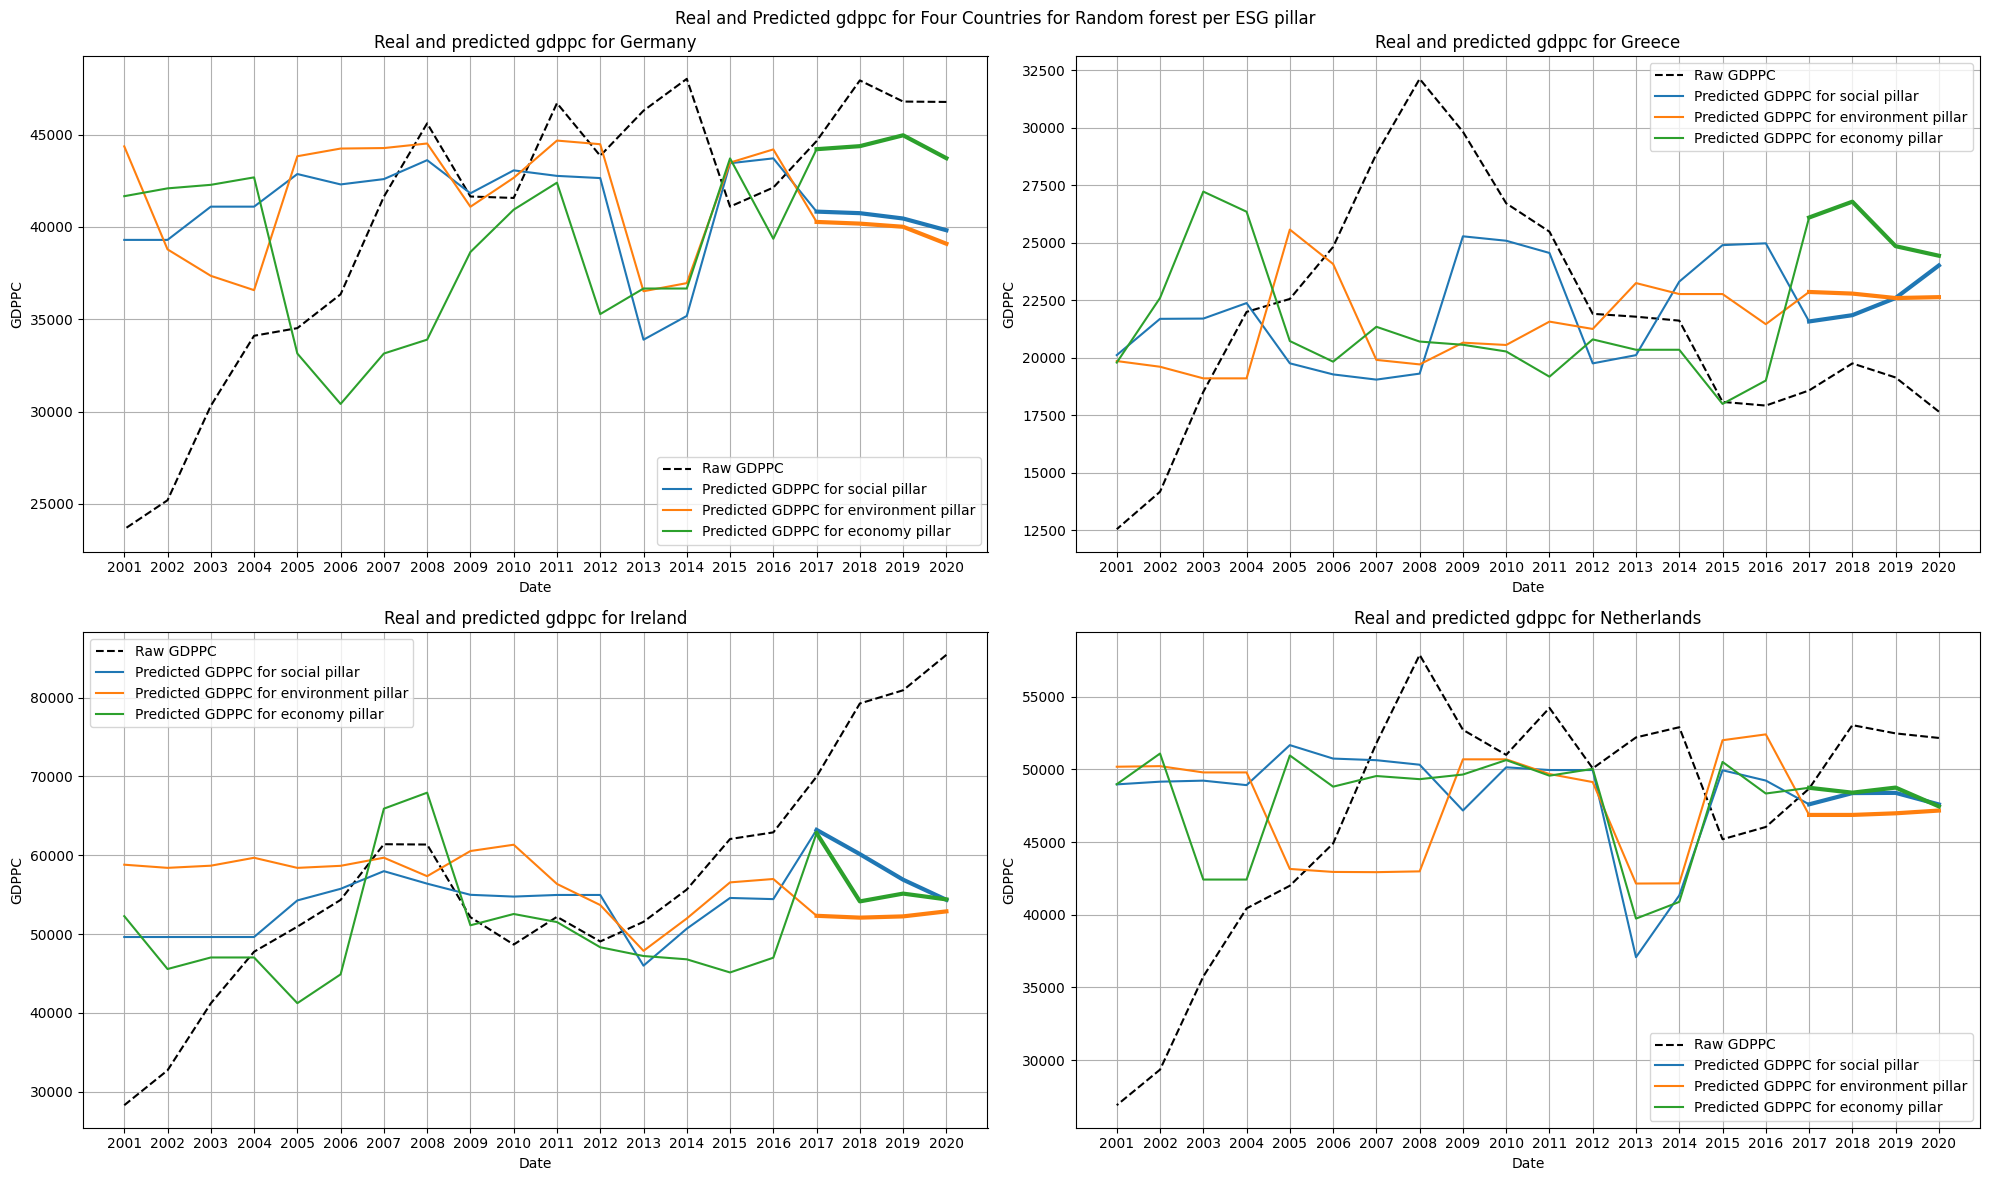

In [191]:
pca_columns_social = ['pca1_social', 'pca2_social']
pca_columns_environment = ['pca1_environment', 'pca2_environment']
pca_columns_economy = ['pca1_economy', 'pca2_economy']



fig, axs = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Real and Predicted gdppc for Four Countries for Random forest per ESG pillar')
subplot_index = [(0,0), (0,1), (1,0), (1,1)]
for index, country in enumerate(ESG_denoised['country'].unique()):
    predict_RF_ESG_social, real_ESG, RMSE_mean_ESG, MAE_mean_ESG = RandomForest_per__country_ESG(country, ESG_pca_df_perESG, pca_columns_social)
    predict_RF_ESG_environment, real_ESG, RMSE_mean_ESG, MAE_mean_ESG = RandomForest_per__country_ESG(country, ESG_pca_df_perESG, pca_columns_environment)
    predict_RF_ESG_economy, real_ESG, RMSE_mean_ESG, MAE_mean_ESG = RandomForest_per__country_ESG(country, ESG_pca_df_perESG, pca_columns_economy)
    ax = axs[subplot_index[index]] 
    ax.plot(ESG[ESG['country'] == country]['date'], ESG[ESG['country'] == country]['gdppc'], 'k--', label = 'Raw GDPPC')
    ax.plot(ESG[ESG['country'] == country]['date'], np.concatenate(predict_RF_ESG_social), label='Predicted GDPPC for social pillar')
    ax.plot(ESG[ESG['country'] == country]['date'], np.concatenate(predict_RF_ESG_environment), label='Predicted GDPPC for environment pillar')
    ax.plot(ESG[ESG['country'] == country]['date'], np.concatenate(predict_RF_ESG_economy), label='Predicted GDPPC for economy pillar')

    last_four_years = ESG[ESG['country'] == country]['date'][:4]
    
    ax.plot(last_four_years, np.concatenate(predict_RF_ESG_social)[:4], color = '#1F77B4', linewidth=3)
    ax.plot(last_four_years, np.concatenate(predict_RF_ESG_environment)[:4], color = '#FF7F0E', linewidth=3)
    ax.plot(last_four_years, np.concatenate(predict_RF_ESG_economy)[:4], color = '#2CA02C', linewidth=3)

    dates = ESG[ESG['country'] == country]['date']
    ax.set_xticks(dates)

    ax.set_title(f'Real and predicted gdppc for {country}')
    ax.set_xlabel('Date')
    ax.set_ylabel('GDPPC')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## 6: Conclusion and Discussion

## 7: References